<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

0이면 레드 1이면 화이트

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


누락된 정보가 있는 지 확인  
누락된 게 있는 경우 데이터를 버리거나 평균값으로 채운 후 사용

In [4]:
wine.describe()

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

간단한 통계 출력

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

데이터와 타깃 설정

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

tin_test_split은 디폴트로 25%가 테스트 세트인데 샘플 수 많으므로 20%만 함 (test_size=0.2)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


점수 안좋음.. 과소적합

### 설명하기 쉬운 모델과 어려운 모델

In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


이걸 봐도 어떤 의미인지 정확히 파악하기 어려움  대부분의 머신러닝이 이렇듯 학습의 결과를 설명하기 어려움

## 결정 트리

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


훈련은 매우 높은데 테스트는 다소 낮음 -> 과대적합

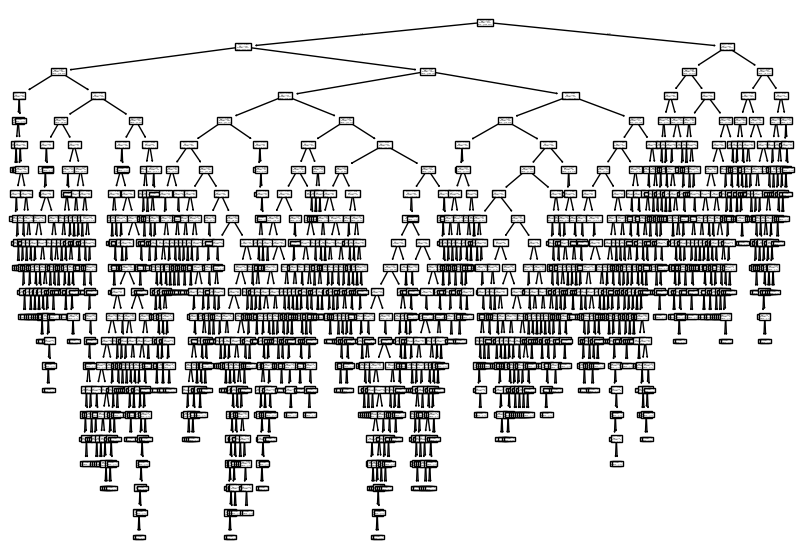

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

너무 복잡하니까 간략화해서 출력해보자

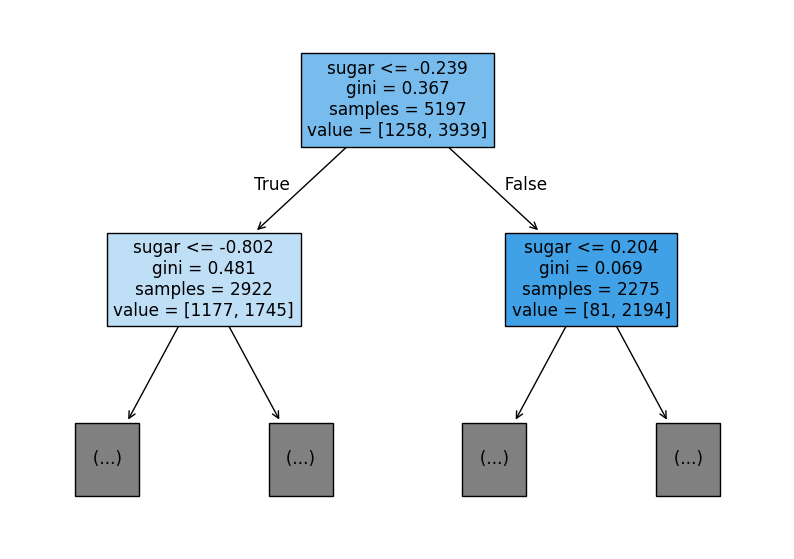

In [15]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

테스트 조건 : sugar  
불순도 : gini (지니 불순도; 1-(음성 클래스 비율^2 + 양성 클래스 비율^2))   
총 샘플 수 : samples  
클래스별 샘플 수 : value(음성,양성)  
filled=true이므로 클래스마다 색을 부여하고 비율이 높아지면 진한색으로 표시

결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이(정보 이득)가 가능한 크도록 트리를 성장시킴  
정보 이득 = 부모의 불순도 - (왼쪽 노드 샘플 수/부모의 샘플 수)X왼쪽 노드 불순도 - (오른쪽 노드 샘플 수/ 부모의 샘플 수)X오른쪽 노드 불순도

엔트로피 불순도도 있으나 보통 디폴트 불순도인 지니 불순도와 차이가 크지 않음


### 가지치기

무분별하게 자라나면 과대적합되므로 가지치기 필요


In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


가장 간단한 가지치기방법 최대 깊이 지정  
훈련 성적은 떨어졌는데 테스트는 별로 안달라짐

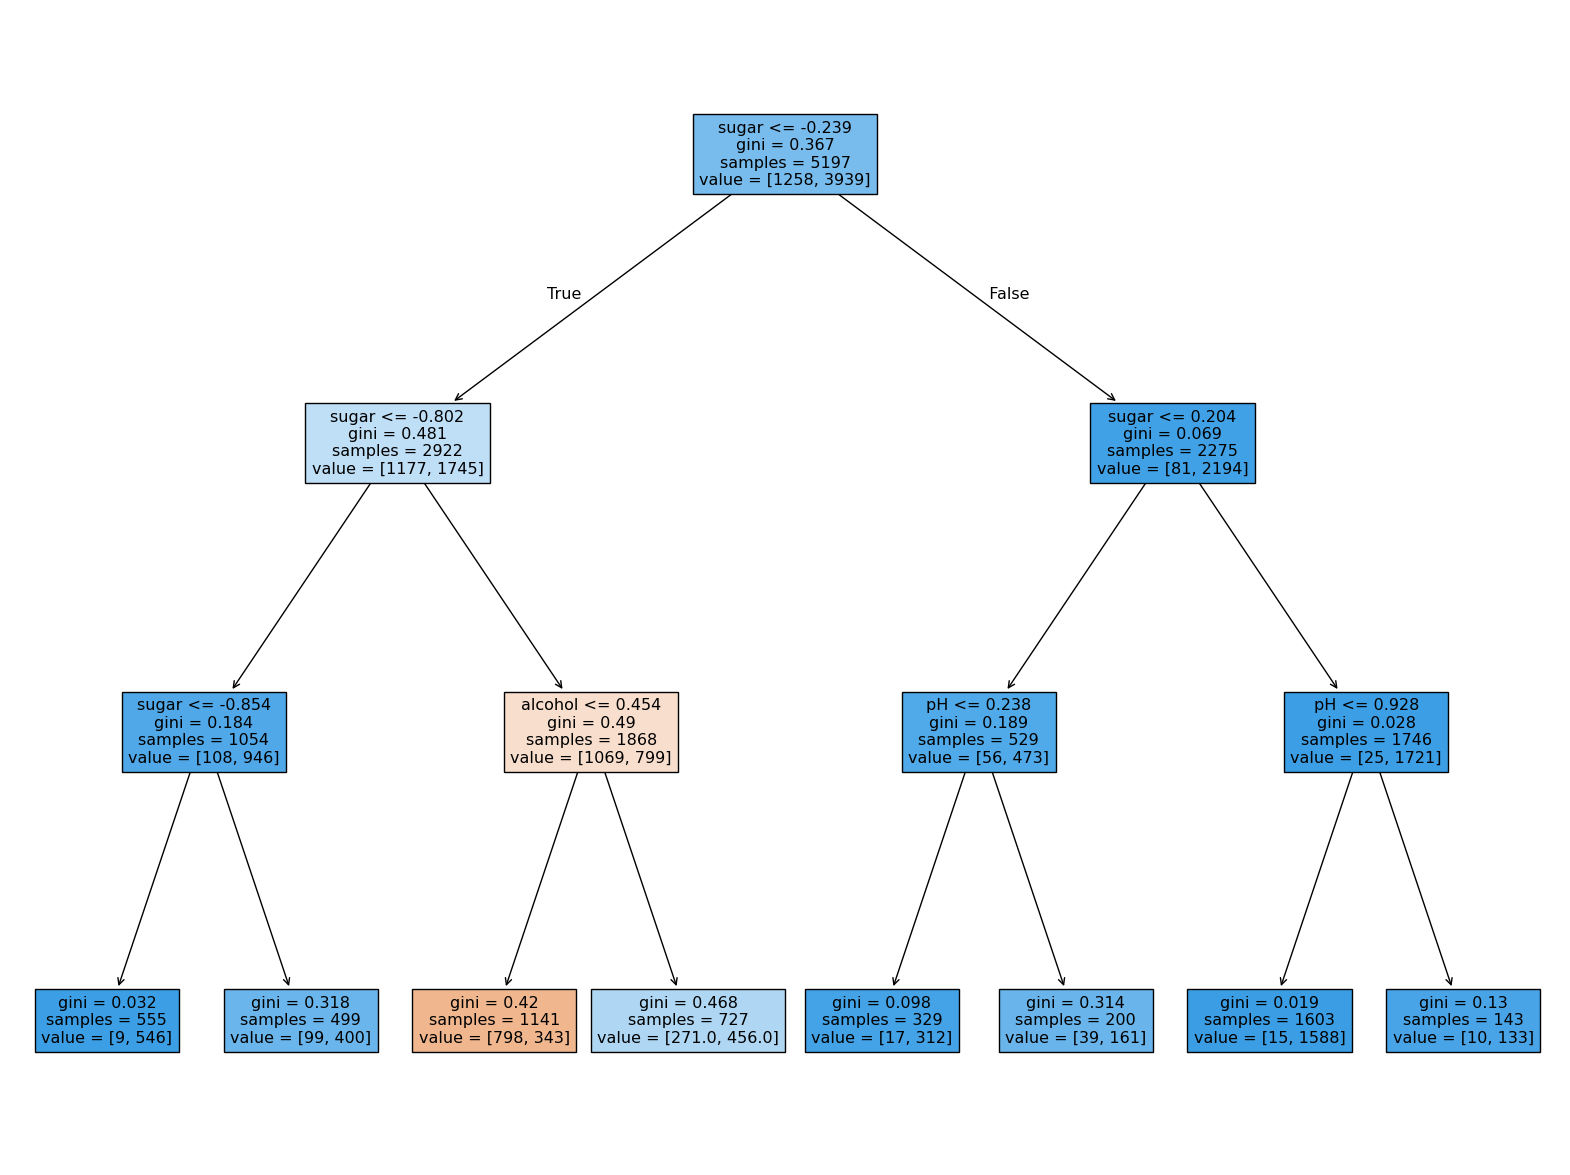

In [17]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [18]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


전처리하기 전의 데이터를 넣어도 결과 그대로임  
불순도를 기준으로 샘플을 나누고, 그는 클래스 비율로 계산함  
이때 특성값의 스케일은 계산에 영향을 미치지 않으므로 결정 트리 알고리즘에 영향 없음 -> 표준화 전처리 불필요

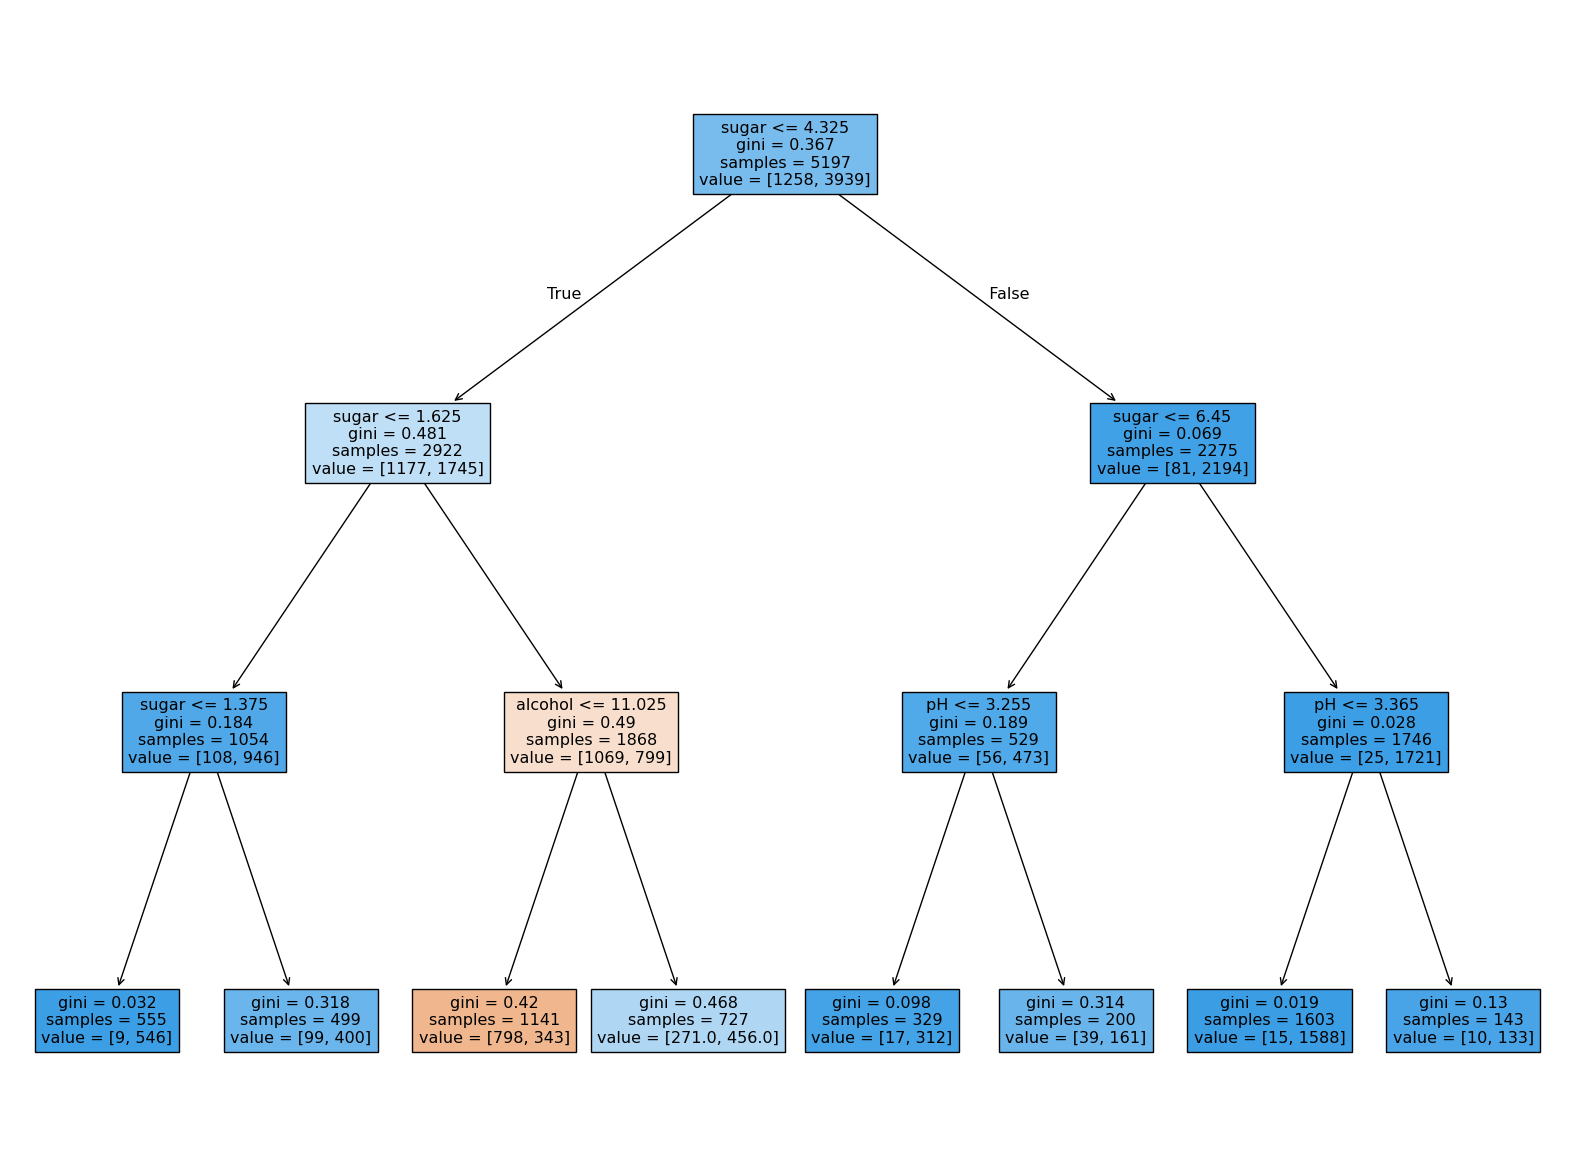

In [19]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

같은 트리지만 특성을 표준점수로 안바꿔서 이해 쉬워짐

In [20]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


특성의 중요도 출력 -> 2번째가 sugar

## 확인문제

In [21]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


어떤 노드의 정보 이득 X (노드의 샘플 수)/(전체 샘플 수) 값이 이 매개변수보다 작으면 더 이상 분할 안함 -> 이전과 다르게 좌우가 균일하지 않은 트리 생성

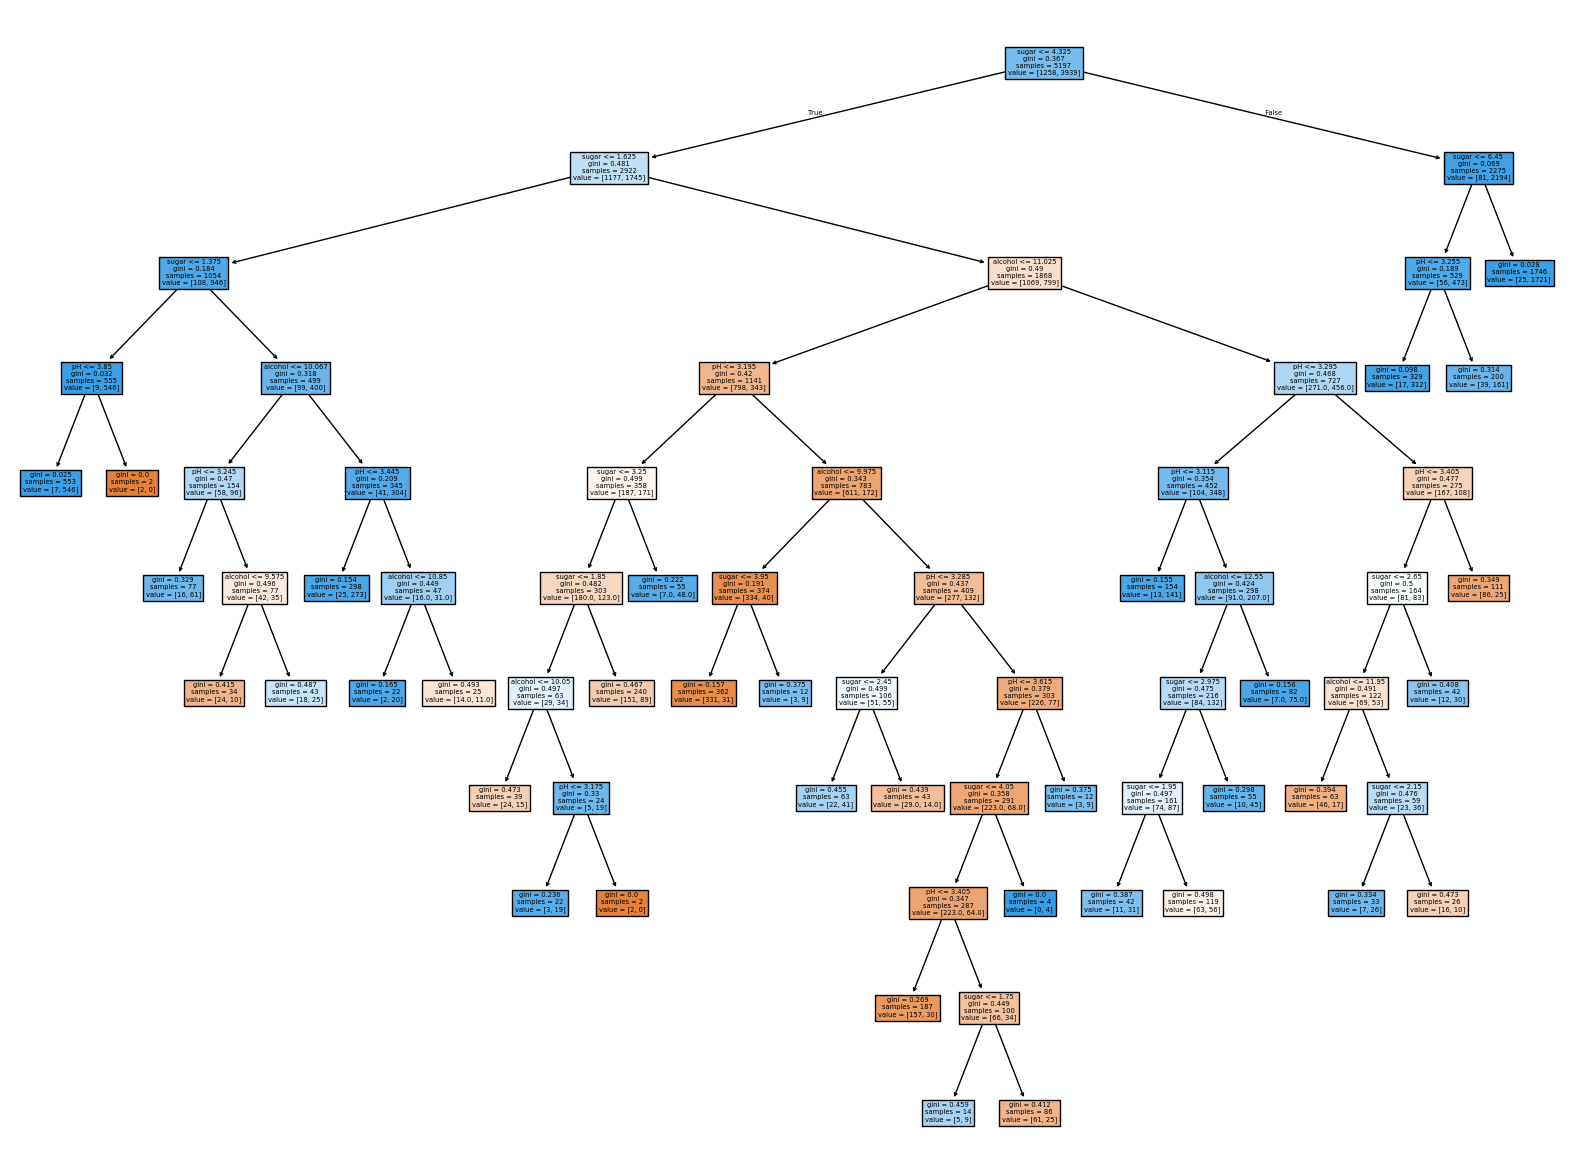

In [22]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()